In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_paper2019/mplstyles


In [2]:
import prob_dist as prob
import imp
imp.reload(prob)

print(np.sqrt(prob.series_NRQ_var_corr(Er=38.5,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=0.16,B=0.18,label='GGA3', \
                               corr1file='data/sigdiff_test1.h5')))

[[0.03397677]]


In [3]:
import h5py

f = h5py.File('data/sigdiff_test1.h5','r')
E = np.zeros((0,))
for i in f['NR/']:
  a = np.asarray([float(i)])
  E = np.concatenate((E,a))

f.close()
E = np.sort(E)

sig_corr = lambda Er: np.sqrt(prob.series_NRQ_var_corr(Er=Er,F=0.0,V=4.0,aH=0.0381, \
                alpha=(1/18.0),A=0.16,B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5'))

sig_corrv = np.vectorize(sig_corr)
print(sig_corrv(E))

sig_corr_aH301 = lambda Er: np.sqrt(prob.series_NRQ_var_corr(Er=Er,F=0.0,V=4.0,aH=0.0301, \
                alpha=(1/18.0),A=0.16,B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5'))

sig_corr_aH301v = np.vectorize(sig_corr_aH301)
print(sig_corr_aH301v(E))

[0.11802666 0.09935824 0.0864587  0.06262166 0.05314698 0.04983596
 0.04947574 0.04631905 0.04357745 0.0411757  0.03717223 0.03548893
 0.03397677 0.03261206 0.03137531 0.03025032 0.02922354 0.02828351
 0.02662616 0.02589334 0.02521582 0.02458819 0.02400572 0.02346427
 0.02249012 0.0220513  0.02164111 0.02125723 0.02056035 0.0202438
 0.01994642 0.01966681 0.01940373 0.01915602 0.01892264 0.01870261
 0.01849507 0.01829919 0.01811424 0.01793952 0.0177744  0.0176183
 0.01747066 0.01733099 0.0171988  0.0170737  0.01695524 0.01684306
 0.01673681 0.01663616 0.0165408  0.01645045 0.01636483 0.0162837
 0.01620682 0.01613396 0.01599952 0.01593755 0.01587885 0.01582326
 0.01577061 0.01572078 0.01567361 0.01562898 0.01558678 0.01554686
 0.01550917 0.01547355 0.01543992 0.01540821 0.01537831 0.01535014
 0.01532363 0.01529868 0.01527526 0.01525327 0.01523265 0.01521336
 0.01519532 0.01517848 0.01516281 0.01514822 0.0151347  0.01512217
 0.01511062 0.01509999 0.01509025 0.01508136 0.01506598 0.0150594

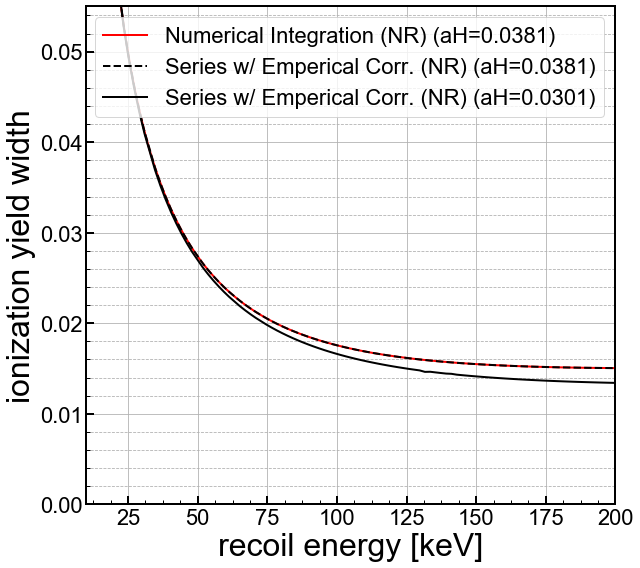

In [4]:
import fano_calc as fc

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='Numerical Integration (NR) (aH={})'.format(0.0381))
ax1.plot(E,sig_corrv(E),color='k',linestyle="--",linewidth=2, \
         label='Series w/ Emperical Corr. (NR) (aH={})'.format(0.0381))
ax1.plot(E,sig_corr_aH301v(E),color='k',linestyle="-",linewidth=2, \
         label='Series w/ Emperical Corr. (NR) (aH={})'.format(0.0301))
#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = 0.0
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [5]:
Ediffs = 40.0

In [6]:

corr_A = lambda A: prob.series_NRQ_sig_c2(Er=Ediffs,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=A, \
                                        B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(corr_A(0.16))
corr_Av = np.vectorize(corr_A)


[[-3.15540771e-09]]


In [7]:
delA = np.arange(0.09,0.24,0.01)
print(corr_Av(delA))

[-9.82187193e-04 -6.24116276e-04 -6.24116276e-04 -3.53235670e-04
 -3.53235670e-04 -3.53787122e-04 -7.50270005e-05 -3.15540771e-09
 -9.33939981e-06 -9.33939981e-06 -9.33939981e-06  1.04937323e-03
  1.34565734e-04  1.34565734e-04  1.34565734e-04]


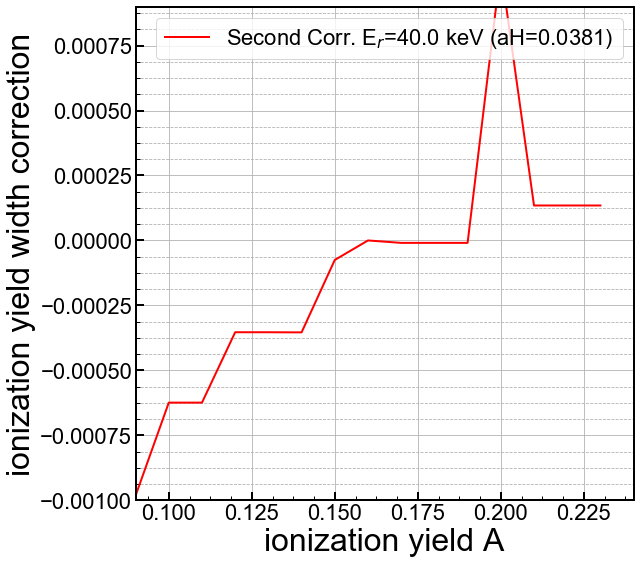

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delA,corr_Av(delA),color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -1.0e-3
ymax = 9.0e-4



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.09, 0.24) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield A',**axis_font)
ax1.set_ylabel('ionization yield width correction',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_A.png'.format(Ediffs))
plt.show()

In [26]:
#get central value
cv = prob.series_NRQ_var_corr(Er=Ediffs,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=0.16, \
                                        B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(cv[0][0])
cv = np.sqrt(cv[0][0])
print(cv)

0.0010816293968388304
0.032888134590439


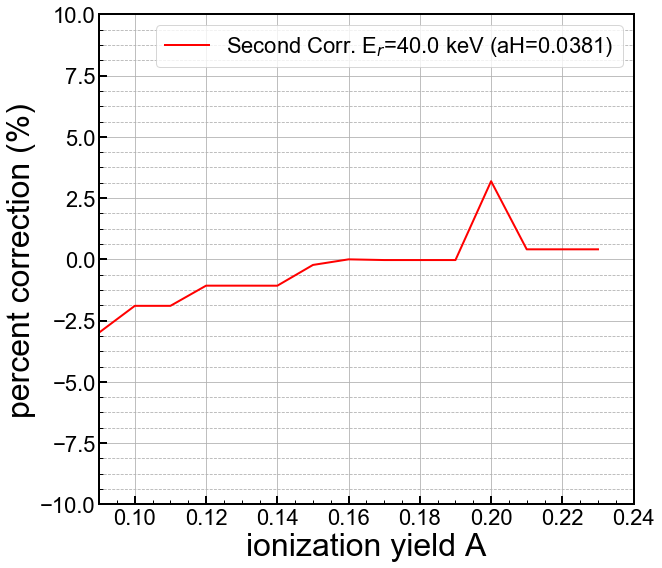

In [27]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delA,(corr_Av(delA)/cv)*100,color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -10
ymax = 10



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.09, 0.24) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield A',**axis_font)
ax1.set_ylabel('percent correction (%)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_A_perc.png'.format(Ediffs))
plt.show()

In [9]:

corr_B = lambda B: prob.series_NRQ_sig_c2(Er=Ediffs,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=0.16, \
                                        B=B,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(corr_B(0.18))
corr_Bv = np.vectorize(corr_B)

delB = np.arange(0.09,0.24,0.01)
print(corr_Bv(delB))


[[-3.15540771e-09]]
[-1.23450974e-03 -1.05178513e-03 -1.05178513e-03 -8.25936126e-04
 -7.48446529e-04 -7.48446529e-04 -4.08792923e-04 -4.08792923e-04
 -9.33939981e-06 -3.15540771e-09 -3.15540771e-09 -3.15540771e-09
  4.44121435e-04  1.17981120e-03  1.02303155e-03]


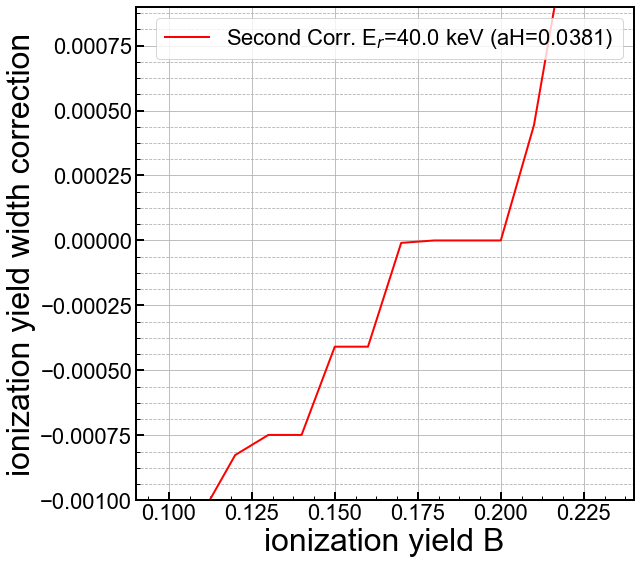

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delB,corr_Bv(delB),color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -1.0e-3
ymax = 9.0e-4



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.09, 0.24) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield B',**axis_font)
ax1.set_ylabel('ionization yield width correction',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_B.png'.format(Ediffs))
plt.show()

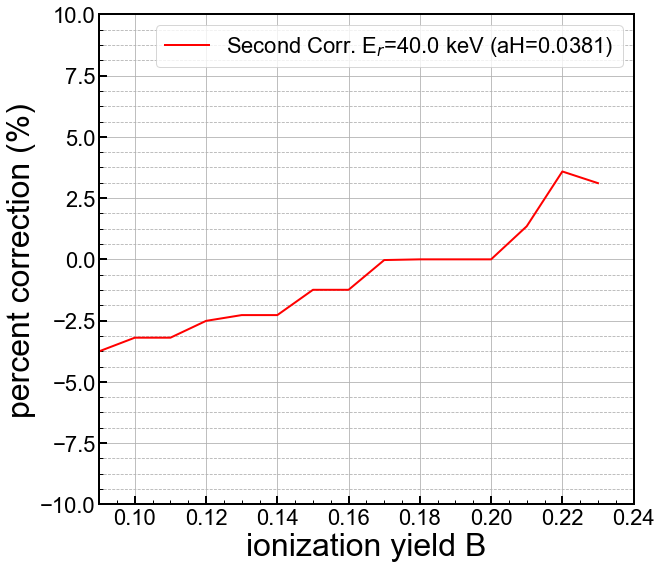

In [37]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delB,(corr_Bv(delB)/cv)*100,color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -10
ymax = 10



ax1.set_yscale('linear')
#ax1.set_yscale('log') 
ax1.set_xlim(0.09, 0.24)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield B',**axis_font)
ax1.set_ylabel('percent correction (%)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_B_perc.png'.format(Ediffs))
plt.show()

In [11]:
import EdwRes as er

corr_aH = lambda varaH: prob.series_NRQ_sig_c2(Er=100.0,F=0.0,V=4.0,aH=varaH,alpha=(1/18.0),A=0.16, \
                                        B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(corr_aH(0.0381))
corr_aHv = np.vectorize(corr_aH)

print(0.0135/er.FWHM_to_SIG) #remember Amy's plot uses the other version of aH
print(0.0180/er.FWHM_to_SIG)
b = 0.0150/er.FWHM_to_SIG
t = 0.0165/er.FWHM_to_SIG

delaH = np.arange(b,t,0.0005)
print(delaH)
print(corr_aHv(delaH))



[[-2.81085219e-09]]
0.03179007060791782
0.04238676081055708
[0.0353223 0.0358223 0.0363223 0.0368223 0.0373223 0.0378223 0.0383223
 0.0388223]
[-2.81085219e-09 -2.81085219e-09 -2.81085219e-09 -2.81085219e-09
 -2.81085219e-09 -2.81085219e-09 -2.81085219e-09 -2.81085219e-09]


In [31]:
corr_V = lambda V: prob.series_NRQ_sig_c2(Er=Ediffs,F=0.0,V=V,aH=0.0381,alpha=(1/18.0),A=0.16, \
                                        B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(corr_V(4.0))
corr_Vv = np.vectorize(corr_V)

print(0.9*4.0)
print(1.2*4.0)
Vb = 0.9*4.0
Vh = 1.2*4.0

delV = np.arange(Vb,Vh,0.05)
print(corr_Vv(delV))

[[-3.15540771e-09]]
3.6
4.8
[-2.15145960e-04 -2.15145960e-04  1.33109044e-04 -1.14729939e-04
 -1.14729939e-04 -1.50933964e-04  3.22041635e-04 -3.15540771e-09
 -3.15540771e-09 -9.33939981e-06 -5.20073286e-05 -5.20073286e-05
  2.35096078e-04  1.43171272e-04  1.43171272e-04  1.27265389e-04
  1.27265389e-04  1.27265389e-04  1.92990789e-04  1.92990789e-04
  1.92990789e-04 -3.06810077e-04 -3.06810077e-04 -3.06810077e-04]


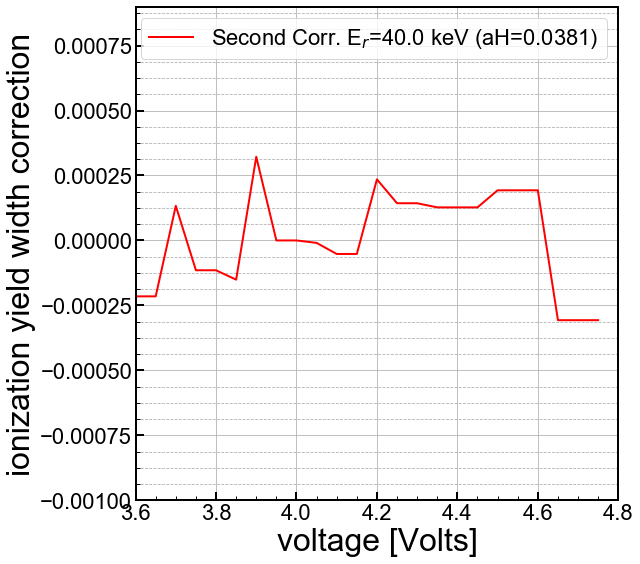

[3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15 4.2  4.25
 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75]


In [34]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delV,corr_Vv(delV),color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -1.0e-3
ymax = 9.0e-4



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(Vb, Vh) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'voltage [Volts]',**axis_font)
ax1.set_ylabel('ionization yield width correction',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_V.png'.format(Ediffs))
plt.show()

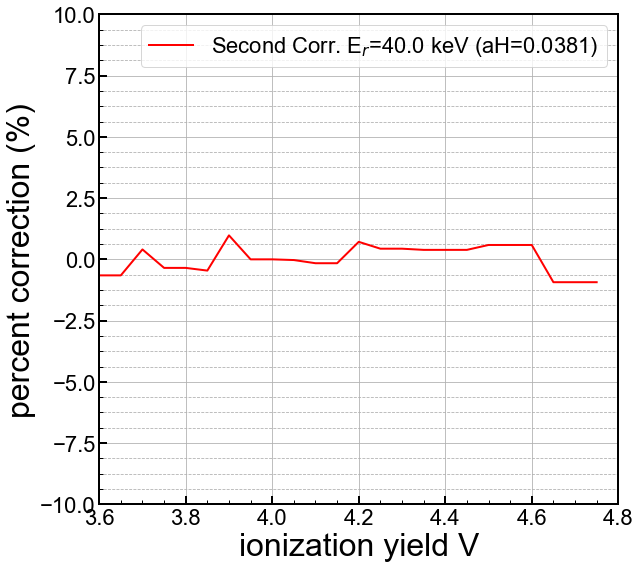

In [36]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delV,(corr_Vv(delV)/cv)*100,color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -10
ymax = 10



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(Vb, Vh) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield V',**axis_font)
ax1.set_ylabel('percent correction (%)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_V_perc.png'.format(Ediffs))
plt.show()